In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
unique_types = df.select_dtypes(include='object').columns.tolist()
for unq in unique_types:
    print(df[unq].value_counts(), end='\n'*2)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64



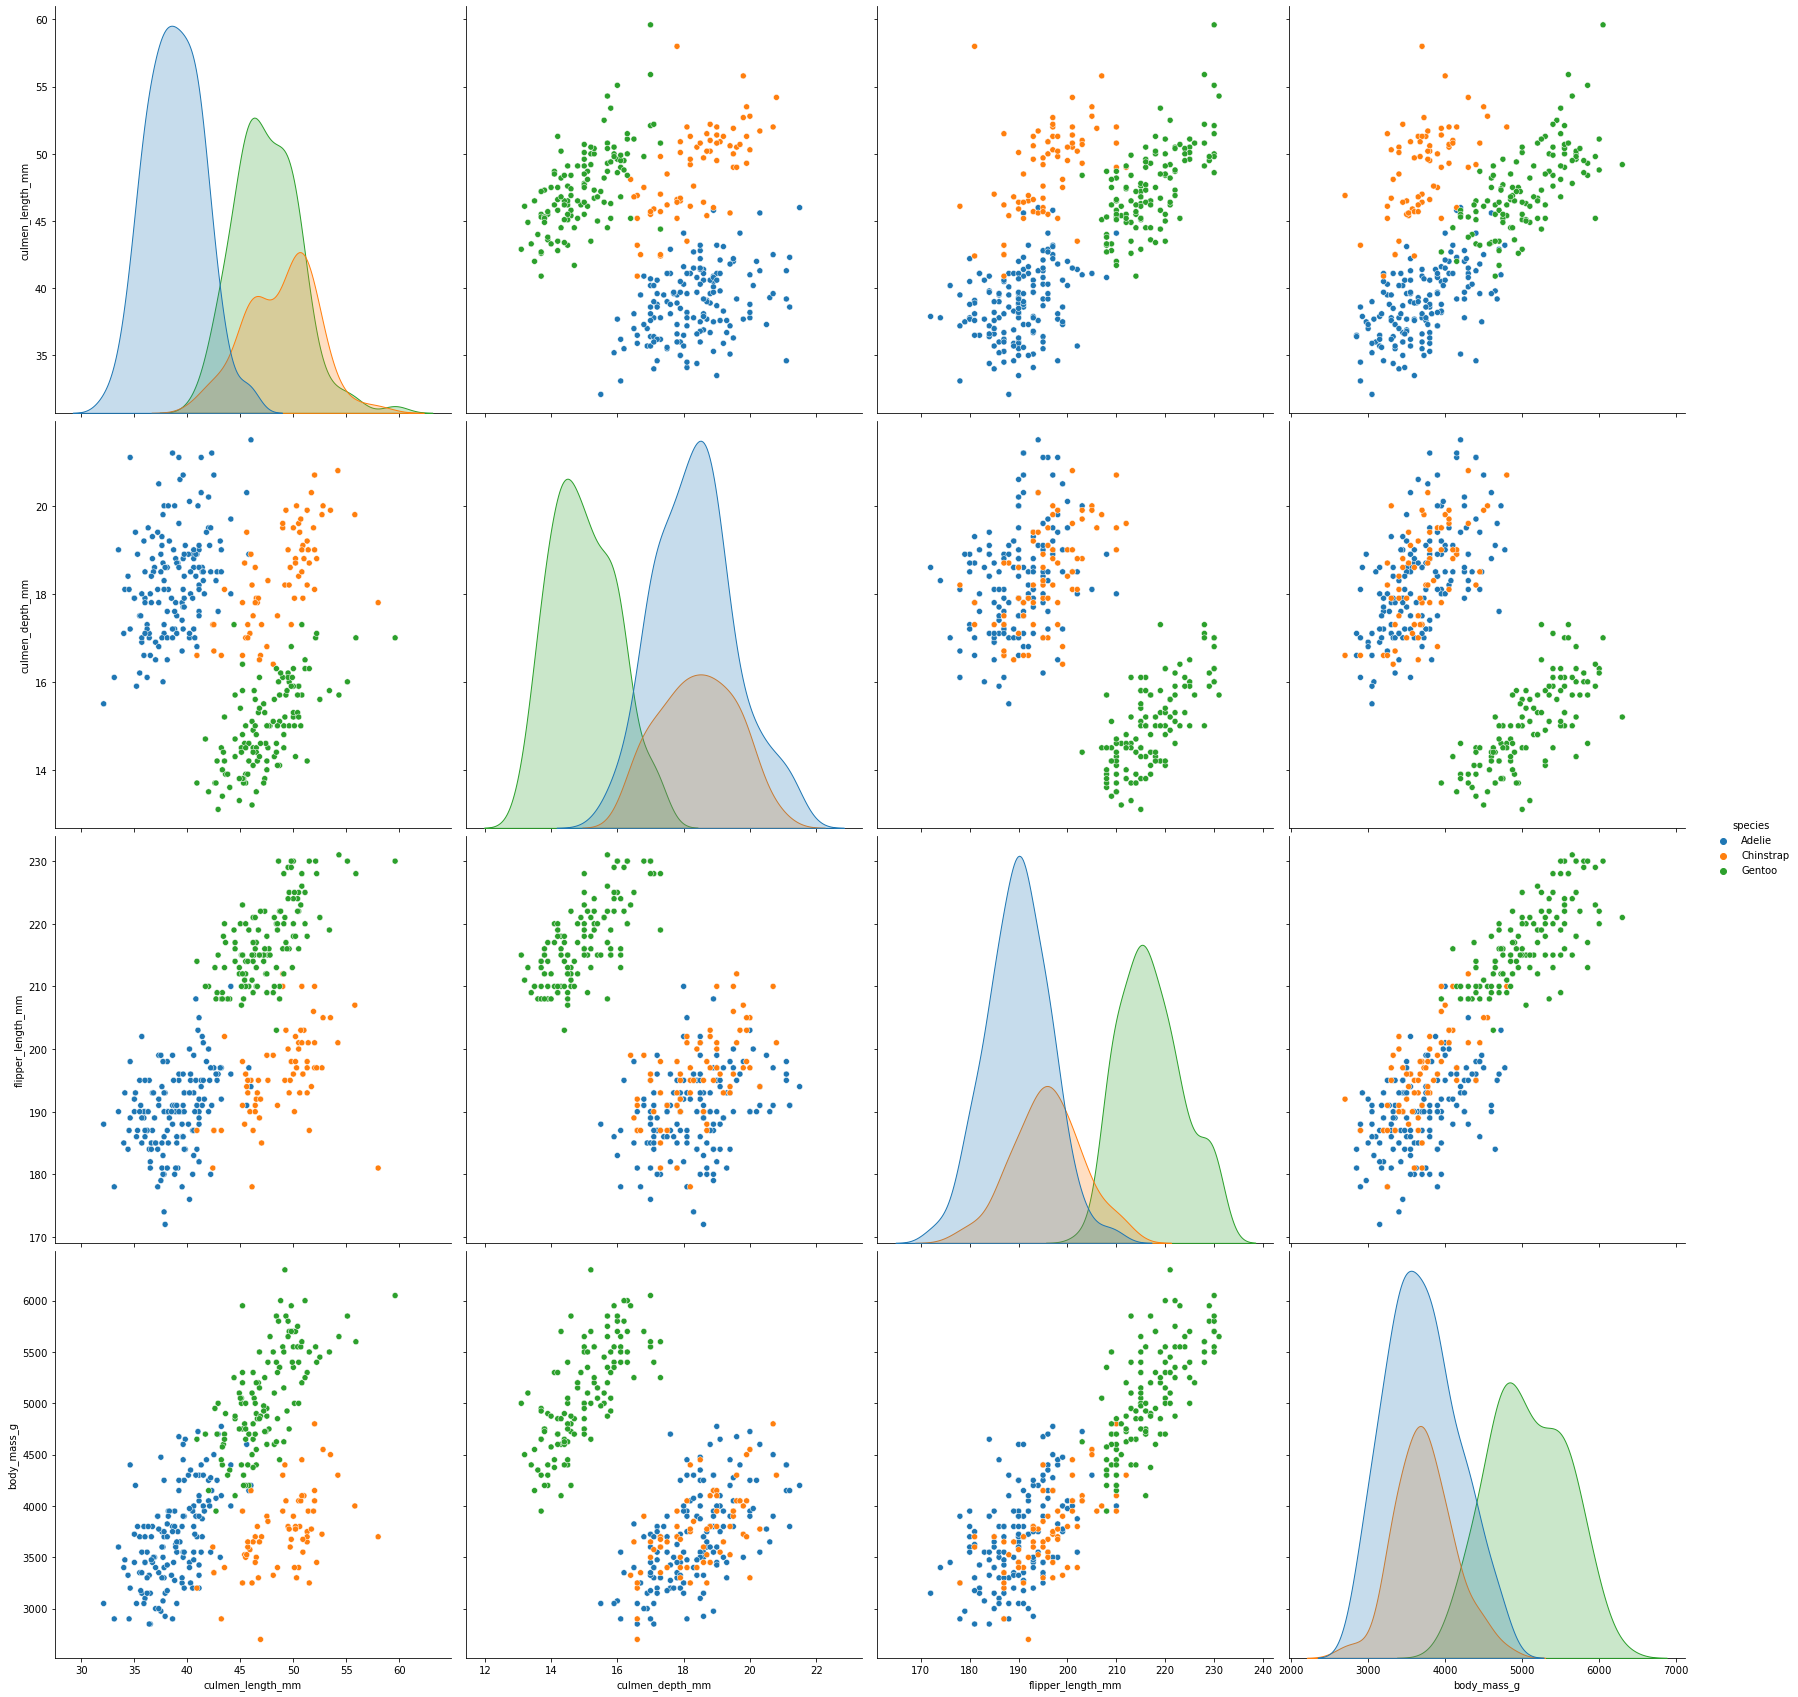

In [6]:
sns.pairplot(
    data=df.drop('sex', axis=1),
    hue='species',
    height=6
);

In [7]:
print(df.empty)
print(df.isnull().sum().any())

False
True


In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(index=[3, 339])
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [12]:
df_nan = df[df.isnull().any(axis=1)]
df = df.drop(df[df.isnull().any(axis=1)].index.tolist())
df.shape, df_nan.shape

((334, 7), (8, 7))

In [13]:
df['sex'] = [1 if i=='MALE' else 0 for i in df['sex']]
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


In [14]:
corrs = dict(df.corr()['sex'].sort_values(ascending=False))
del corrs['sex']
corrs

{'body_mass_g': 0.42139950298186374,
 'culmen_depth_mm': 0.37404318169718914,
 'culmen_length_mm': 0.34326989668012836,
 'flipper_length_mm': 0.25083259686555825}

In [15]:
def sub_df(dataframe):
    species = dataframe['species'].unique().tolist()
    islands = dataframe['island'].unique().tolist()
    dataframes = []
    for i in range(len(species)):
        spe = dataframe['species'] == species[i]
        for j in range(len(islands)):
            isl = dataframe['island'] == islands[j]
            if not dataframe[spe & isl].empty:
                dataframes.append(dataframe[spe & isl])
                
    for dataframe in dataframes:
        dataframe['w_avg'] = corrs['culmen_length_mm']*dataframe['culmen_length_mm'] \
                           + corrs['culmen_depth_mm']*dataframe['culmen_depth_mm'] \
                           + corrs['flipper_length_mm']*dataframe['flipper_length_mm'] \
                           + corrs['body_mass_g']*dataframe['body_mass_g']
                
    return dataframes

In [16]:
sub_dfs = sub_df(df)

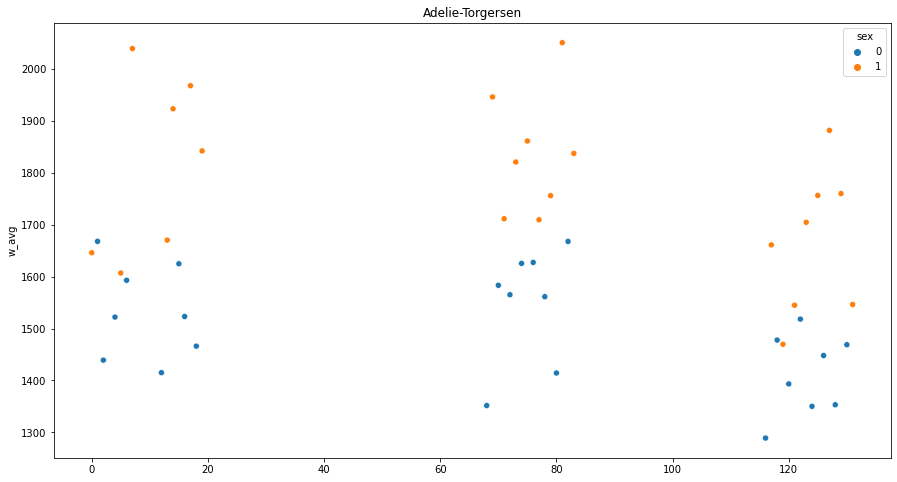

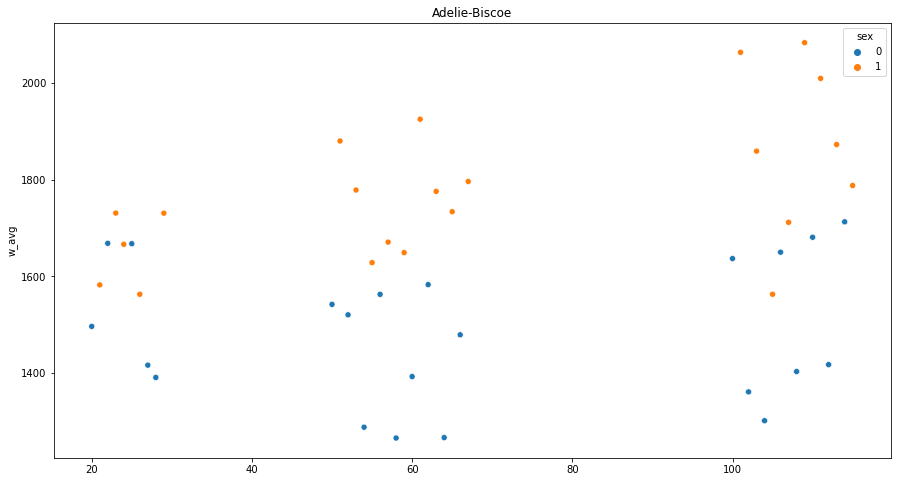

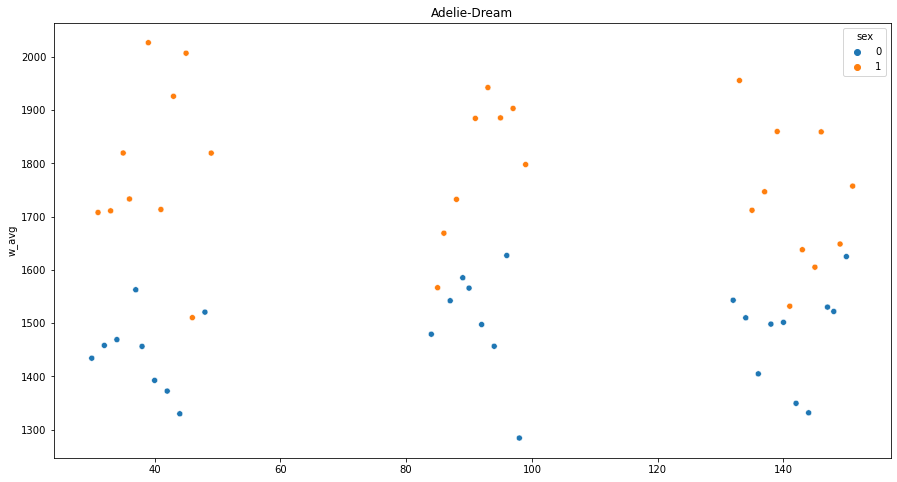

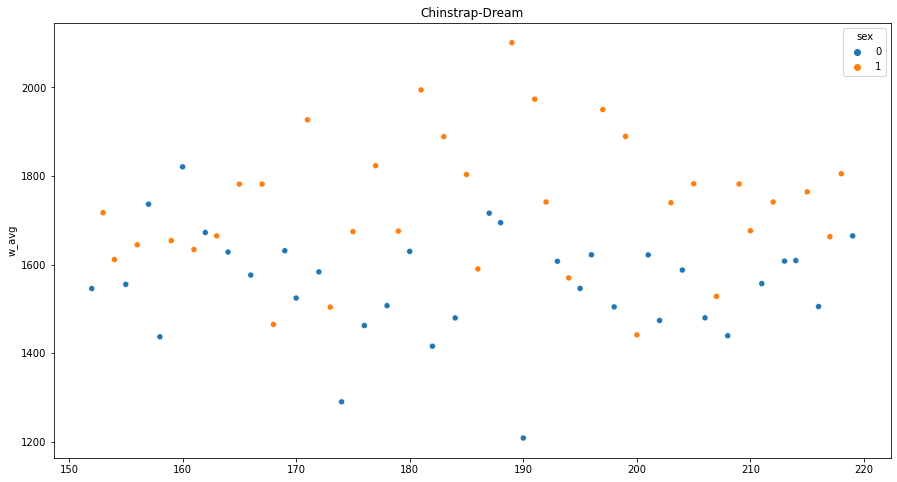

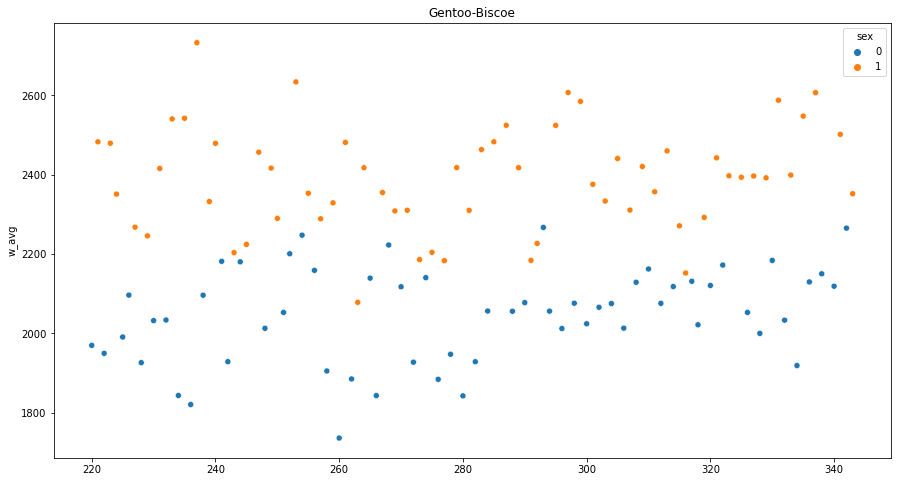

In [17]:
for i in range(len(sub_dfs)):
    plt.figure(figsize=(15, 8))
    sns.scatterplot(
        data=sub_dfs[i],
        x=sub_dfs[i].index,
        y='w_avg',
        hue='sex'
    );
    sp = sub_dfs[i]['species'].tolist().pop()
    isl = sub_dfs[i]['island'].tolist().pop()
    plt.title(f'{sp}-{isl}')

In [18]:
nan_sub_dfs = sub_df(df_nan)

In [19]:
nan_sub_dfs[0]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,w_avg
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,1531.249649
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,1860.579089
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,1456.644963
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,1623.774578


In [20]:
nan_sub_dfs[1]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,w_avg
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,1318.504593


In [21]:
nan_sub_dfs[2]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,w_avg
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,1802.542131
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2034.431156
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2066.690955


In [22]:
a = nan_sub_dfs[0]['w_avg'].values.tolist()
for i in range(len(nan_sub_dfs[0]['sex'])):
    if a[i] < 1700:
        nan_sub_dfs[0]['sex'].iloc[i] = 0
    else:
        nan_sub_dfs[0]['sex'].iloc[i] = 1 

In [23]:
b = nan_sub_dfs[1]['w_avg'].values.tolist()
for i in range(len(nan_sub_dfs[1]['sex'])):
    if b[i] < 1650:
        nan_sub_dfs[1]['sex'].iloc[i] = 0
    else:
        nan_sub_dfs[1]['sex'].iloc[i] = 1 

In [24]:
c = nan_sub_dfs[2]['w_avg'].values.tolist()
for i in range(len(nan_sub_dfs[2]['sex'])):
    if c[i] < 2200:
        nan_sub_dfs[2]['sex'].iloc[i] = 0
    else:
        nan_sub_dfs[2]['sex'].iloc[i] = 1 

In [25]:
df_nans = pd.concat(nan_sub_dfs)
df_nans = df_nans.drop('w_avg', axis=1)

In [26]:
df = pd.concat([df_nans, df]).sort_index()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [27]:
df['sex'] = df['sex'].astype(int)

In [28]:
df = pd.get_dummies(
    data=df, 
    columns=['island'], 
    drop_first=True
)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1


In [29]:
df.to_csv('penguins_eda.csv', index=False)